=== Gaussian Noise Augmentation Analysis ===
Analyzing images from: plastic
Number of images: 2


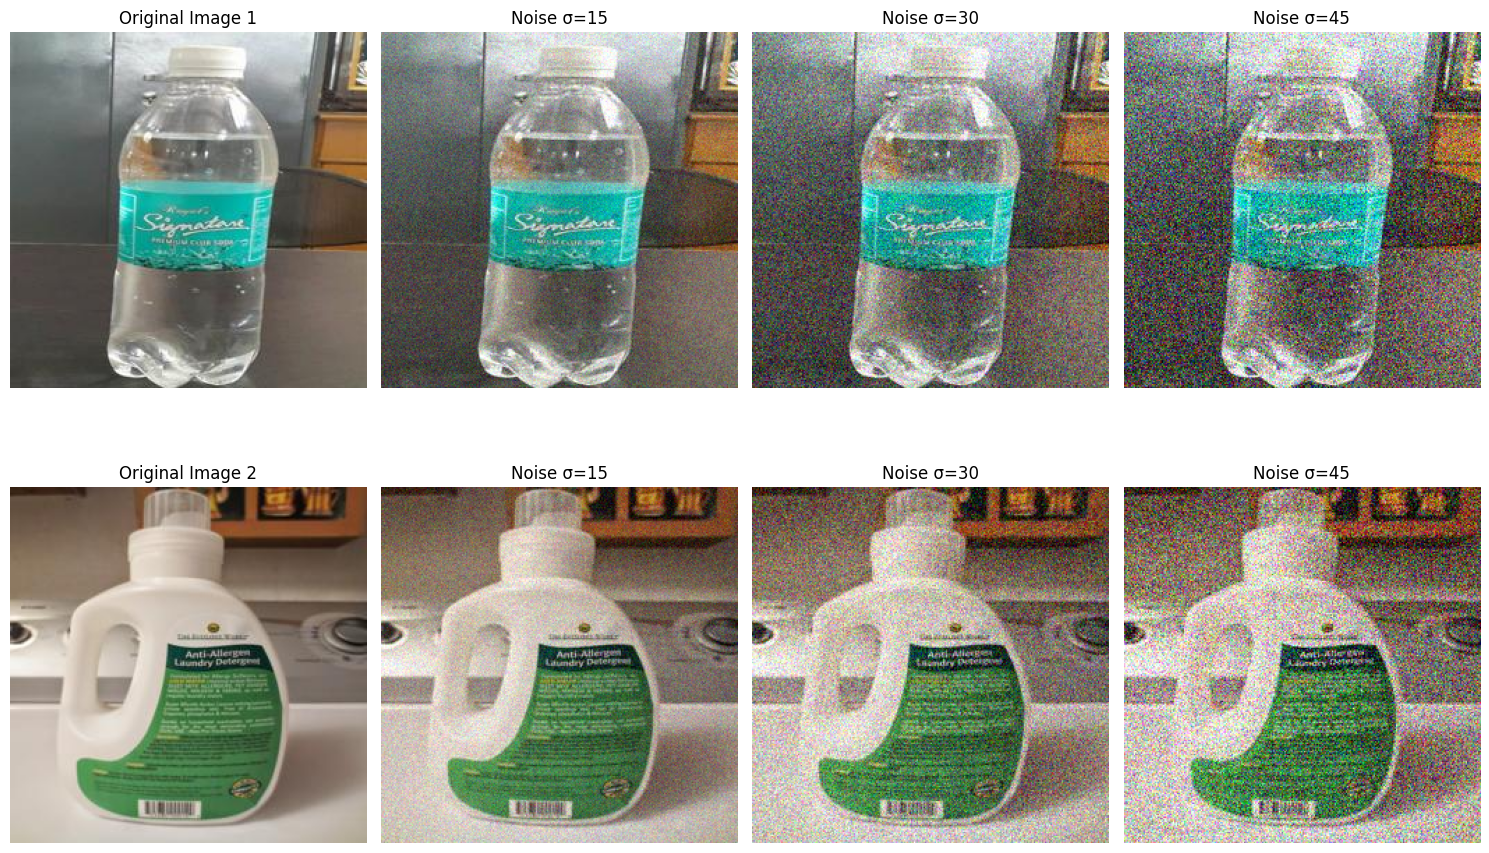


=== EDA: Histogram Analysis ===


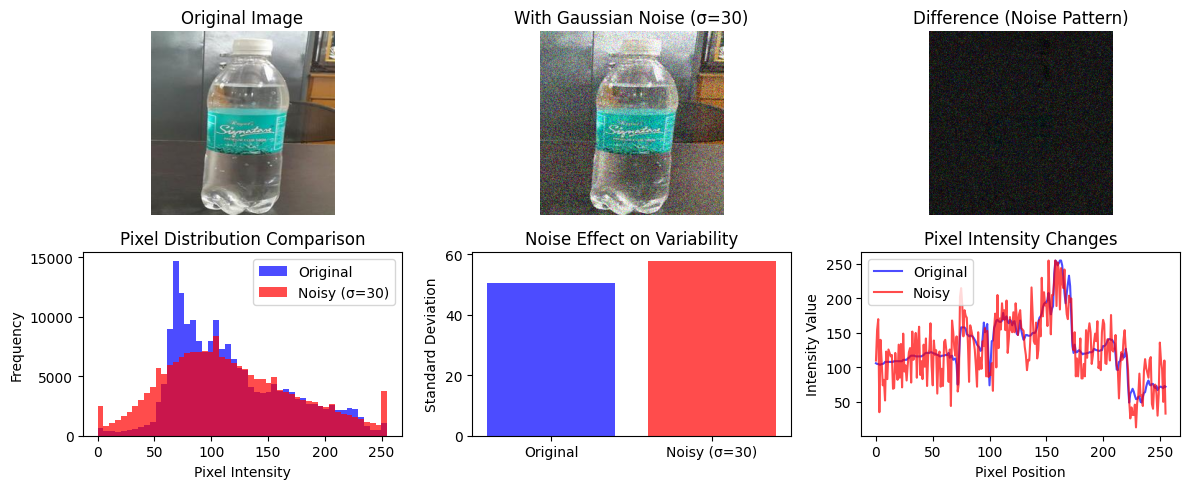


=== STATISTICAL SUMMARY ===
Metric          Original   Noisy (σ=30) Change    
--------------------------------------------------
Mean            117.3      116.6        -0.6%
Std Dev         50.6       57.8         +14.2%
Variance        2565.2     3343.4       +30.3%

INTEGRATION WITH GROUP PIPELINE

# In group_pipeline.ipynb - Integration Example:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def add_gaussian_noise(image, sigma=25):
    """My Gaussian noise function"""
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image.astype(np.float64) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Add to data augmentation pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    preprocessing_function=lambda x: add_gaussian_noise(x, sigma=25)
)



In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# 1. Gaussian Noise Function
def add_gaussian_noise(image, sigma=25):
    """
    Adds Gaussian noise to an image for data augmentation
    sigma: controls the amount of noise (higher = more noise)
    """
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image.astype(np.float64) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# 2. Load Sample Images from Dataset
def load_sample_images():
    """Loads sample images from garbage classification dataset"""
    dataset_path = "/content/garbage-dataset-classification/Garbage_Dataset_Classification/images"

    try:
        # Get available classes
        classes = [d for d in os.listdir(dataset_path)
                  if os.path.isdir(os.path.join(dataset_path, d))]

        if not classes:
            raise FileNotFoundError("No classes found")

        sample_class = classes[0]  # Use first class
        class_path = os.path.join(dataset_path, sample_class)

        # Get image files
        image_files = [f for f in os.listdir(class_path)
                      if f.endswith(('.jpg','.png','.jpeg'))]

        if not image_files:
            raise FileNotFoundError("No images found")

        # Load first 2 images
        images = []
        for i in range(min(2, len(image_files))):
            img_path = os.path.join(class_path, image_files[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)

        return images, sample_class

    except Exception as e:
        print(f"Dataset not found: {e}. Using demo images.")
        # Create demo garbage images
        demo_images = []
        for i in range(2):
            img = np.random.randint(50, 200, (150, 150, 3), dtype=np.uint8)
            # Add some patterns to simulate garbage
            img[30:80, 30:80] = [255, 0, 0]  # Red square
            img[90:140, 90:140] = [0, 255, 0]  # Green square
            demo_images.append(img)
        return demo_images, "Demo Garbage"

# 3. Main Analysis Code
def main():
    print("=== Gaussian Noise Augmentation Analysis ===")

    # Load sample images
    images, class_name = load_sample_images()
    print(f"Analyzing images from: {class_name}")
    print(f"Number of images: {len(images)}")

    # Apply different noise levels
    noise_levels = [15, 30, 45]  # Low, Medium, High

    # Create the main visualization
    plt.figure(figsize=(15, 10))

    # For each sample image
    for img_idx, original_img in enumerate(images):
        # Apply different noise levels
        noisy_images = [add_gaussian_noise(original_img, sigma=sigma)
                       for sigma in noise_levels]

        # Plot original and noisy images
        for i, sigma in enumerate([0] + noise_levels):  # 0 = original
            plt.subplot(len(images), 4, img_idx * 4 + i + 1)

            if i == 0:  # Original image
                plt.imshow(original_img)
                plt.title(f'Original Image {img_idx+1}')
            else:  # Noisy images
                plt.imshow(noisy_images[i-1])
                plt.title(f'Noise σ={sigma}')

            plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 4. EDA Visualization - Histogram Analysis
    print("\n=== EDA: Histogram Analysis ===")
    plt.figure(figsize=(12, 5))

    # Use first image for detailed analysis
    original_img = images[0]
    medium_noise_img = add_gaussian_noise(original_img, sigma=30)

    # Plot 1: Original vs Noisy Image
    plt.subplot(2, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(medium_noise_img)
    plt.title('With Gaussian Noise (σ=30)')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    difference = np.abs(original_img.astype(float) - medium_noise_img.astype(float))
    plt.imshow(difference.astype(np.uint8))
    plt.title('Difference (Noise Pattern)')
    plt.axis('off')

    # Plot 2: Histogram Comparison
    plt.subplot(2, 3, 4)
    # Flatten all pixel values
    original_pixels = original_img.flatten()
    noisy_pixels = medium_noise_img.flatten()

    plt.hist(original_pixels, bins=50, alpha=0.7, color='blue', label='Original')
    plt.hist(noisy_pixels, bins=50, alpha=0.7, color='red', label='Noisy (σ=30)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Distribution Comparison')
    plt.legend()

    # Plot 3: Statistical Analysis
    plt.subplot(2, 3, 5)
    # Calculate statistics
    stats_original = {
        'Mean': np.mean(original_img),
        'Std Dev': np.std(original_img),
        'Variance': np.var(original_img)
    }

    stats_noisy = {
        'Mean': np.mean(medium_noise_img),
        'Std Dev': np.std(medium_noise_img),
        'Variance': np.var(medium_noise_img)
    }

    # Plot standard deviation comparison
    categories = ['Original', 'Noisy (σ=30)']
    std_values = [stats_original['Std Dev'], stats_noisy['Std Dev']]

    plt.bar(categories, std_values, color=['blue', 'red'], alpha=0.7)
    plt.ylabel('Standard Deviation')
    plt.title('Noise Effect on Variability')

    # Plot 4: Pixel Value Changes
    plt.subplot(2, 3, 6)
    # Show how individual pixels change
    sample_pixels_orig = original_img[50, :, 0]  # One row of red channel
    sample_pixels_noisy = medium_noise_img[50, :, 0]

    plt.plot(sample_pixels_orig, 'b-', label='Original', alpha=0.7)
    plt.plot(sample_pixels_noisy, 'r-', label='Noisy', alpha=0.7)
    plt.xlabel('Pixel Position')
    plt.ylabel('Intensity Value')
    plt.title('Pixel Intensity Changes')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 5. Print Statistical Summary
    print("\n=== STATISTICAL SUMMARY ===")
    print(f"{'Metric':<15} {'Original':<10} {'Noisy (σ=30)':<12} {'Change':<10}")
    print("-" * 50)

    metrics = ['Mean', 'Std Dev', 'Variance']
    for metric in metrics:
        orig_val = stats_original[metric]
        noisy_val = stats_noisy[metric]
        change = ((noisy_val - orig_val) / orig_val) * 100

        print(f"{metric:<15} {orig_val:<10.1f} {noisy_val:<12.1f} {change:+.1f}%")

# 6. Integration Example
def show_integration_example():
    """Shows how this would integrate with group pipeline"""
    print("\n" + "="*50)
    print("INTEGRATION WITH GROUP PIPELINE")
    print("="*50)

    integration_code = '''
# In group_pipeline.ipynb - Integration Example:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def add_gaussian_noise(image, sigma=25):
    \"\"\"My Gaussian noise function\"\"\"
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image.astype(np.float64) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Add to data augmentation pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    preprocessing_function=lambda x: add_gaussian_noise(x, sigma=25)
)
'''
    print(integration_code)

# Run the complete analysis
if __name__ == "__main__":
    main()
    show_integration_example()